In [1]:
!pip install pandas matplotlib seaborn plotly


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [5]:
df = pd.read_csv("/content/US_Accidents_Dec21_updated.csv")
df.shape

<ipython-input-5-f681bd1ef14f>:1: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/US_Accidents_Dec21_updated.csv") # Updated path to include 'data/' folder


(519185, 47)

In [6]:
df.head()
df.info()
df.describe()
df.isnull().sum() / len(df) * 100  # Check missing values %


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519185 entries, 0 to 519184
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     519185 non-null  object 
 1   Severity               519185 non-null  int64  
 2   Start_Time             519185 non-null  object 
 3   End_Time               519185 non-null  object 
 4   Start_Lat              519185 non-null  float64
 5   Start_Lng              519185 non-null  float64
 6   End_Lat                519185 non-null  float64
 7   End_Lng                519185 non-null  float64
 8   Distance(mi)           519185 non-null  float64
 9   Description            519185 non-null  object 
 10  Number                 183324 non-null  float64
 11  Street                 519184 non-null  object 
 12  Side                   519184 non-null  object 
 13  City                   519149 non-null  object 
 14  County                 519184 non-nu

,0
ID,0.000000
Severity,0.000000
Start_Time,0.000000
End_Time,0.000000
Start_Lat,0.000000
Start_Lng,0.000000
End_Lat,0.000000
End_Lng,0.000000
Distance(mi),0.000000
Description,0.000000


In [8]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%d-%m-%Y %H:%M', errors='coerce')
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day
df['Month'] = df['Start_Time'].dt.month
df['Weekday'] = df['Start_Time'].dt.day_name()


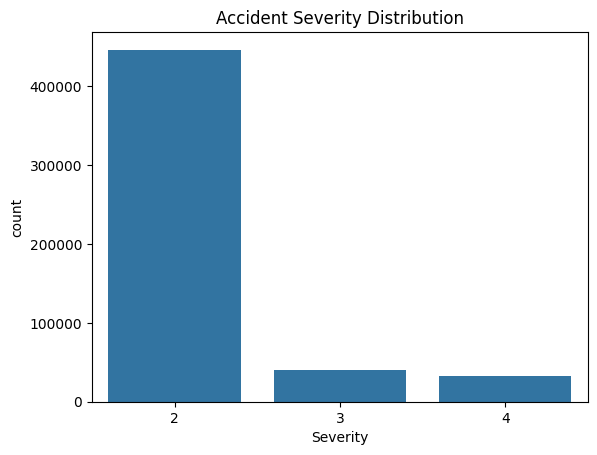

In [9]:
sns.countplot(x='Severity', data=df)
plt.title("Accident Severity Distribution")
plt.show()


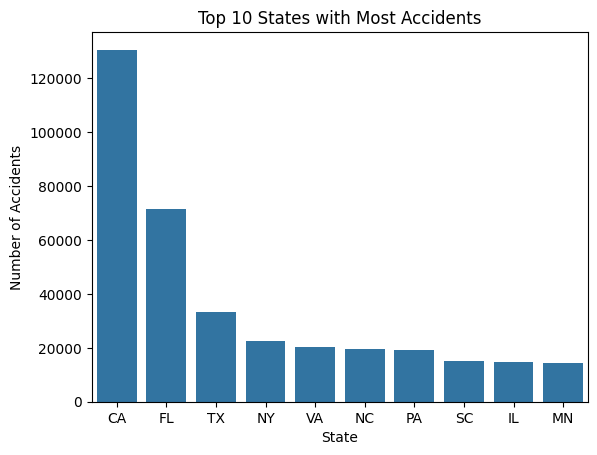

In [10]:
top_states = df['State'].value_counts().head(10)
sns.barplot(x=top_states.index, y=top_states.values)
plt.title("Top 10 States with Most Accidents")
plt.ylabel("Number of Accidents")
plt.show()



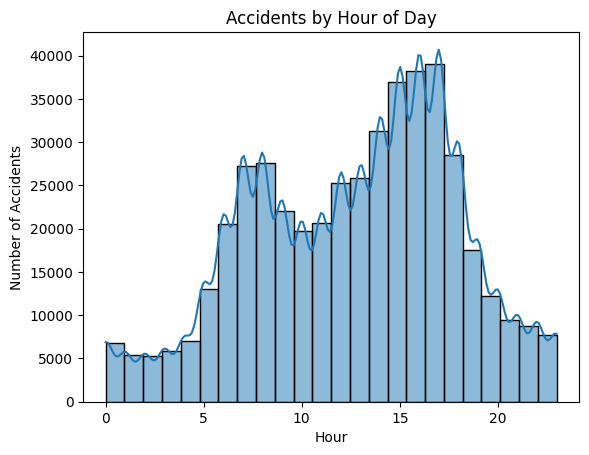

In [12]:
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()


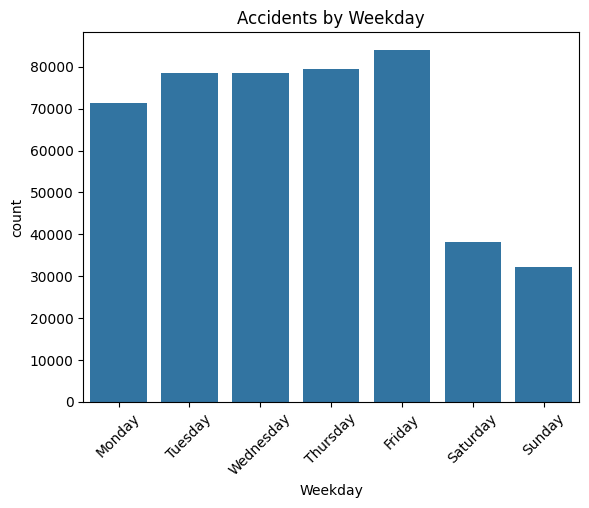

In [13]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='Weekday', order=weekday_order)
plt.title("Accidents by Weekday")
plt.xticks(rotation=45)
plt.show()


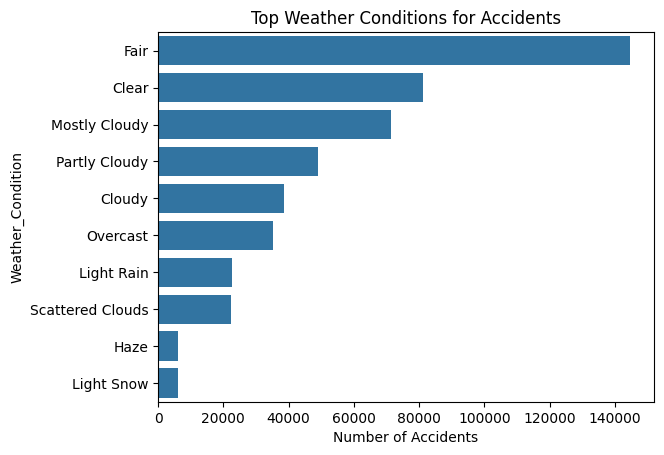

In [14]:
top_weather = df['Weather_Condition'].value_counts().head(10)
sns.barplot(x=top_weather.values, y=top_weather.index)
plt.title("Top Weather Conditions for Accidents")
plt.xlabel("Number of Accidents")
plt.show()


In [15]:
# Sample 10,000 points for performance
sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000)

fig = px.scatter_mapbox(sample_df,
                        lat='Start_Lat',
                        lon='Start_Lng',
                        zoom=3,
                        height=500)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title='Sample Accident Locations in USA')
fig.show()


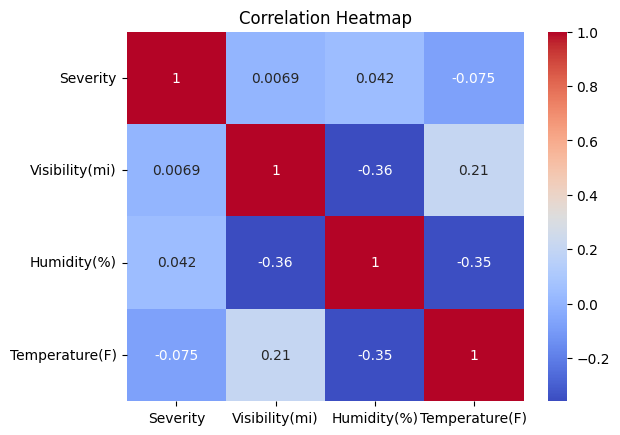

In [16]:
corr = df[['Severity', 'Visibility(mi)', 'Humidity(%)', 'Temperature(F)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
